In [300]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint, complex_ode, ode
from odeintw import odeintw
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

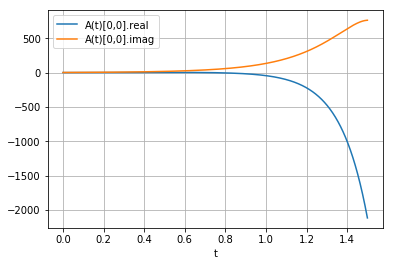

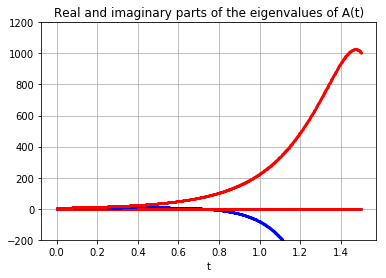

In [8]:
def system(M, t):
    A, B, C = M
    dA_dt = A.dot(C) + B.dot(C)
    dB_dt = B.dot(C)
    dC_dt = C
    return np.array([dA_dt, dB_dt, dC_dt])


t = np.linspace(0, 1.5, 1000)

#A_initial= [1, 2, 2.3, 4.3, 2.1, 5.2, 2.13, 3.43]
A_initial = np.array([[1 + 2.1j, 2 + 5.2j], [2.3 + 2.13j, 4.3 + 3.43j]])

# B_initial= [7, 2.7, 1.23, 3.3, 3.1, 5.12, 1.13, 3]
B_initial = np.array([[7 + 3.1j, 2.7 + 5.12j], [1.23 + 1.13j, 3.3 + 3j]])

# C_initial= [0.5, 0.9, 0.63, 0.43, 0.21, 0.5, 0.11, 0.3]
C_initial = np.array([[0.5 + 0.21j, 0.9 + 0.5j], [0.63 + 0.11j, 0.43 + 0.3j]])

M_initial = np.array([A_initial, B_initial, C_initial])
sol = odeintw(system, M_initial, t)

A = sol[:, 0, :, :]
B = sol[:, 1, :, :]
C = sol[:, 2, :, :]

plt.figure(1)
plt.plot(t, A[:, 0, 0].real, label='A(t)[0,0].real')
plt.plot(t, A[:, 0, 0].imag, label='A(t)[0,0].imag')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('t')

A_evals = np.linalg.eigvals(A)

plt.figure(2)
plt.plot(t, A_evals[:,0].real, 'b.', markersize=3, mec='b')
plt.plot(t, A_evals[:,0].imag, 'r.', markersize=3, mec='r')
plt.plot(t, A_evals[:,1].real, 'b.', markersize=3, mec='b')
plt.plot(t, A_evals[:,1].imag, 'r.', markersize=3, mec='r')
plt.ylim(-200, 1200)
plt.grid(True)
plt.title('Real and imaginary parts of the eigenvalues of A(t)')
plt.xlabel('t')
plt.show()

Text(0.5,0,'t')

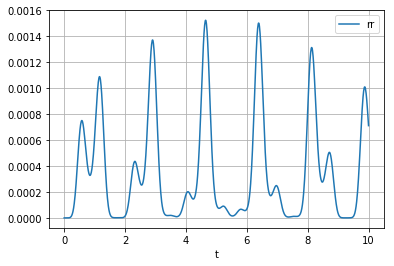

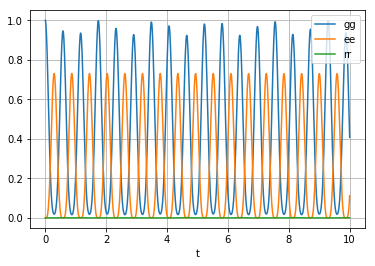

In [11]:
def system(M, t):
    A, B, C = M
    dA_dt = (1/1j)*(A.dot(B) - B.dot(A))
    dB_dt = 0*B
    dC_dt = 0*C
    return np.array([dA_dt, dB_dt, dC_dt])

t = np.linspace(0, 10, 1000)
Omega_1 = 10.0+0*1j
Omega_2 = 1.0+0*1j
Delta_r = 0.0+0*1j
Delta_e = 4.0+0*1j

#A_initial= [1, 2, 2.3, 4.3, 2.1, 5.2, 2.13, 3.43]
A_initial = np.array([[0, 0, 0],
                      [0, 0, 0],
                      [0, 0, 1]])

# B_initial= [7, 2.7, 1.23, 3.3, 3.1, 5.12, 1.13, 3]
B_initial = np.array([[-Delta_r, Omega_2/2, 0],
                      [np.conj(Omega_2)/2, -Delta_e, Omega_1/2],
                      [0, np.conj(Omega_1)/2, 0]])

# C_initial= [0.5, 0.9, 0.63, 0.43, 0.21, 0.5, 0.11, 0.3]
C_initial = np.array([[0, 0, 0],
                      [0, 0, 0],
                      [0, 0, 0]])

M_initial = np.array([A_initial, B_initial, C_initial])
sol = odeintw(system, M_initial, t)

A = sol[:, 0, :, :]
B = sol[:, 1, :, :]
C = sol[:, 2, :, :]

rho_gg = np.conj(A[:, 2, 2])*A[:, 2, 2]
rho_ee = np.conj(A[:, 1, 1])*A[:, 1, 1]
rho_rr = np.conj(A[:, 0, 0])*A[:, 0, 0]

plt.figure(1)
plt.plot(t, rho_rr, label='rr')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('t')

plt.figure(2)
plt.plot(t, rho_gg, label='gg')
plt.plot(t, rho_ee, label='ee')
plt.plot(t, rho_rr, label='rr')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('t')

Text(0.5,0,'t')

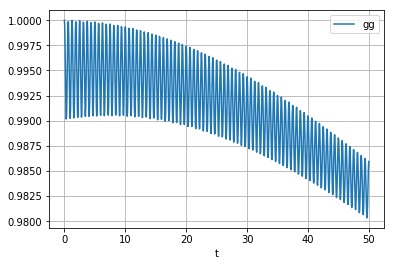

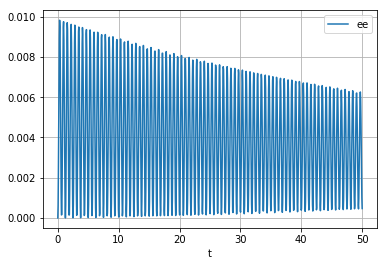

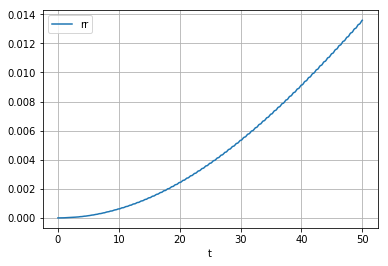

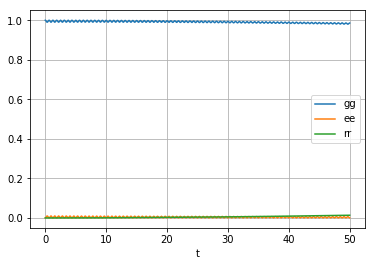

In [280]:
def system(rho, t):
    hb = 1
    G_e = 1/(2*np.pi*7.5)
    G_r = 0
    O_p = 1
    O_c = 0.1
    D_p = 10
    D_c = -10
    
    [[rho_gg, rho_ge, rho_gr],
     [rho_eg, rho_ee, rho_er],
     [rho_rg, rho_re, rho_rr]] = rho
    
    L = np.array([[G_e*rho_ee, -1/2*G_e*rho_ge, -1/2*G_r*rho_gr],
                  [-1/2*G_e*rho_eg, -G_e*rho_ee+G_r*rho_rr, -1/2*(G_e+G_r)*rho_er],
                  [-1/2*G_r*rho_rg, -1/2*(G_e+G_r)*rho_re, -G_r*rho_rr]])
    
    H = hb*np.array([[0, O_p/2, 0],
                     [O_p/2, -D_p, O_c/2],
                     [0, O_c/2, -D_p-D_c]])
    
    drho_dt = (1j)/hb*(np.matmul(rho,H) - np.matmul(H,rho)) + L
    return drho_dt

t = np.linspace(0, 50, 1000)

#A_initial= [1, 2, 2.3, 4.3, 2.1, 5.2, 2.13, 3.43]
rho_initial = np.array([[1.0+0*(1j), 0, 0],
                        [0, 0, 0],
                        [0, 0, 0]])

sol = odeintw(system, rho_initial, t)

rho_gg = sol[:, 0, 0]
rho_ee = sol[:, 1, 1]
rho_rr = sol[:, 2, 2]

plt.figure(1)
plt.plot(t, rho_gg, label='gg')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('t')

plt.figure(2)
plt.plot(t, rho_ee, label='ee')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('t')

plt.figure(3)
plt.plot(t, rho_rr, label='rr')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('t')

plt.figure(4)
plt.plot(t, rho_gg, label='gg')
plt.plot(t, rho_ee, label='ee')
plt.plot(t, rho_rr, label='rr')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('t')

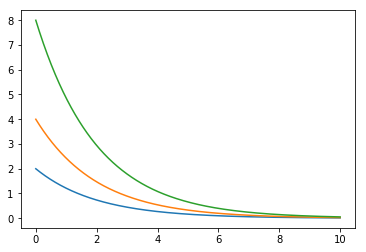

In [214]:
def master_equation(t, y, a): 
    return a * y

#sol = solve_ivp(master_equation, [0, 10], [2, 4, 8], t_eval=np.linspace(0,10,1000))
sol = solve_ivp(lambda t, y: master_equation(t, y, -0.5), [0, 10], [2, 4, 8], t_eval=np.linspace(0,10,1000))

plt.figure(1)
plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])
plt.plot(sol.t, sol.y[2,:])

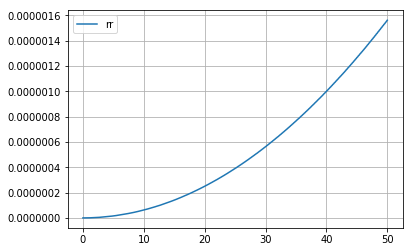

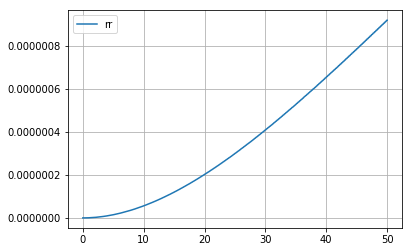

In [420]:
def master_equation(t, rho, D_c): 
    
    rho = rho.reshape((3,3))
    
    hb = 1
    G_e = 1/(2*np.pi*7.5)
    G_r = 0
    O_p = 1
    O_c = 0.01
    D_p = 100
    #D_c = 0
    
    [[rho_gg, rho_ge, rho_gr],
     [rho_eg, rho_ee, rho_er],
     [rho_rg, rho_re, rho_rr]] = rho
    
    L = np.array([[G_e*rho_ee, -1/2*G_e*rho_ge, -1/2*G_r*rho_gr],
                  [-1/2*G_e*rho_eg, -G_e*rho_ee+G_r*rho_rr, -1/2*(G_e+G_r)*rho_er],
                  [-1/2*G_r*rho_rg, -1/2*(G_e+G_r)*rho_re, -G_r*rho_rr]])
    
    H = hb*np.array([[0, O_p/2, 0],
                     [O_p/2, -D_p, O_c/2],
                     [0, O_c/2, -D_p-D_c]])
    
    drho_dt = (1j)/hb*(np.matmul(rho,H) - np.matmul(H,rho)) + L
    
    return drho_dt.flatten()

rho_0 = np.array([[1.0+0*(1j), 0, 0],
                  [0, 0, 0],
                  [0, 0, 0]])

t = np.linspace(0,50,1000)

sol = solve_ivp(lambda t, rho: master_equation(t, rho, -100), [min(t), max(t)], rho_0.flatten(), t_eval=t)

plt.figure(1)
#plt.plot(sol.t, sol.y[0,:], label='gg')
#plt.plot(sol.t, sol.y[4,:], label='ee')
plt.plot(sol.t, sol.y[8,:], label='rr')
plt.legend(loc='best')
plt.grid(True)

sol = solve_ivp(lambda t, rho: master_equation(t, rho, 0), [min(t), max(t)], rho_0.flatten(), t_eval=t)

plt.figure(2)
#plt.plot(sol.t, sol.y[0,:], label='gg')
#plt.plot(sol.t, sol.y[4,:], label='ee')
plt.plot(sol.t, sol.y[8,:], label='rr')
plt.legend(loc='best')
plt.grid(True)

In [429]:
def master_equation(t, rho, D_c): 
    
    rho = rho.reshape((3,3))
    
    G_e = 1/21
    G_r = 0.1
    O_p = 1
    O_c = 0.01
    D_p = 15
    #D_c = 0
    
    [[rho_gg, rho_ge, rho_gr],
     [rho_eg, rho_ee, rho_er],
     [rho_rg, rho_re, rho_rr]] = rho
    
    L = np.array([[G_e*rho_ee, -1/2*G_e*rho_ge, -1/2*G_r*rho_gr],
                  [-1/2*G_e*rho_eg, -G_e*rho_ee+G_r*rho_rr, -1/2*(G_e+G_r)*rho_er],
                  [-1/2*G_r*rho_rg, -1/2*(G_e+G_r)*rho_re, -G_r*rho_rr]])
    
    H = np.array([[0, O_p/2, 0],
                     [O_p/2, -D_p, O_c/2],
                     [0, O_c/2, -D_p-D_c]])
    
    drho_dt = (1j)*(np.matmul(rho,H) - np.matmul(H,rho)) + L
    
    return drho_dt.flatten()

rho_0 = np.array([[1.0+0*(1j), 0, 0],
                  [0, 0, 0],
                  [0, 0, 0]])

t = np.linspace(0,10,1000)
D_c = np.linspace(-20,20,100)

X, Y = np.meshgrid(t, D_c)

rho_gg = np.zeros(np.shape(X))
rho_ee = np.zeros(np.shape(X))
rho_rr = np.zeros(np.shape(X))

for i in range(len(D_c)):
    sol = solve_ivp(lambda t, rho: master_equation(t, rho, D_c[i]), [min(t), max(t)], rho_0.flatten(), t_eval=t)
    rho_gg[i,:] = sol.y[0,:]
    rho_ee[i,:] = sol.y[4,:]
    rho_rr[i,:] = sol.y[8,:]

C:\Users\reyalp\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\reyalp\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\reyalp\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: ComplexWarning: Casting complex values to real discards the imaginary part


In [ ]:
fig = plt.figure(figsize=(8,6))
plt.pcolormesh(X,Y,rho_rr)
plt.colorbar()

In [436]:
np.max(np.imag(rho_gg))

0.0